<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Honeycomb Lattice__


## Honeycomb Lattice and Tight-Binding Model

The honeycomb lattice consists of two interpenetrating triangular sublattices, denoted $ A $ and $ B $. It is not a Bravais lattice. The primitive lattice vectors are:

$$
\vec{a}_1 = a \left( \frac{3}{2}, \frac{\sqrt{3}}{2} \right), \quad 
\vec{a}_2 = a \left( \frac{3}{2}, -\frac{\sqrt{3}}{2} \right)
$$

where $ a $ is the nearest-neighbor distance.

The nearest-neighbor vectors connecting an atom in sublattice $ A $ to its three neighbors in sublattice $ B $ are:

$$
\vec{\delta}_1 = a \left( 0, 1 \right), \quad
\vec{\delta}_2 = a \left( \frac{\sqrt{3}}{2}, -\frac{1}{2} \right), \quad
\vec{\delta}_3 = a \left( -\frac{\sqrt{3}}{2}, -\frac{1}{2} \right)
$$

The nearest-neighbor tight-binding Hamiltonian is:

$$
H = -t \sum_{\langle i,j \rangle} \left( c_i^\dagger c_j + \text{h.c.} \right)
$$

In momentum space, using the basis $ \Psi^\dagger_{\vec{k}} = \left( c_{A,\vec{k}}^\dagger, c_{B,\vec{k}}^\dagger \right) $, the Bloch Hamiltonian becomes:

$$
H(\vec{k}) = -t 
\begin{pmatrix}
0 & f(\vec{k}) \\
f^*(\vec{k}) & 0
\end{pmatrix}, \quad \text{with } 
f(\vec{k}) = \sum_{j=1}^3 e^{i \vec{k} \cdot \vec{\delta}_j}
$$

The energy dispersion relation is:

$$
E(\vec{k}) = \pm t \left| f(\vec{k}) \right|
$$

At the Dirac points $ K $ and $ K' $, the function $ f(\vec{k}) $ vanishes, leading to gapless linear dispersions:

$$
\vec{K} = \frac{4\pi}{3a} \left( \frac{1}{2}, \frac{\sqrt{3}}{2} \right), \quad 
\vec{K}' = \frac{4\pi}{3a} \left( \frac{1}{2}, -\frac{\sqrt{3}}{2} \right)
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
t = 2.8     # eV, hopping amplitude
a = 1.0     # lattice constant (can be set to real value ~2.46 Å if needed)

# Lattice vectors
a1 = a * np.array([3/2, np.sqrt(3)/2])
a2 = a * np.array([3/2, -np.sqrt(3)/2])

# Nearest neighbor vectors from A to B sublattices
delta = [
    a * np.array([0, 1]),
    a * np.array([np.sqrt(3)/2, -0.5]),
    a * np.array([-np.sqrt(3)/2, -0.5])
]

In [4]:
# Define function f(k)
def f_k(kx, ky):
    return sum(np.exp(1j * (kx * dx + ky * dy)) for dx, dy in delta)

# Energy dispersion
def energy(kx, ky):
    fk = f_k(kx, ky)
    return t * np.abs(fk)

# High symmetry points in reciprocal space
Gamma = np.array([0.0, 0.0])
K = (4 * np.pi / (3 * a)) * np.array([0.5, np.sqrt(3)/2])
M = (np.pi / a) * np.array([1.0, 0.0])

# Interpolate between two k-points
def interpolate(p1, p2, n=100):
    return np.linspace(p1, p2, n)

# Create path through BZ: Gamma -> K -> M
path = np.concatenate([
    interpolate(Gamma, K, 100),
    interpolate(K, M, 100),
    interpolate(M, Gamma, 100)
])

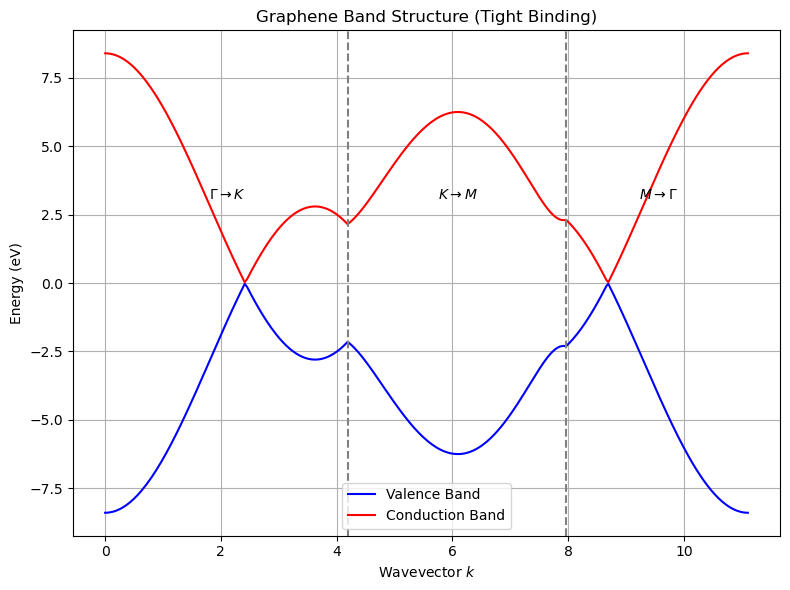

In [5]:
# Calculate energies along the path
energies = []
for k in path:
    en = energy(k[0], k[1])
    energies.append([-en, en])  # Negative and positive bands

energies = np.array(energies)

# X-axis for plotting: distance along the path
dist = np.zeros(len(path))
for i in range(1, len(path)):
    dist[i] = dist[i-1] + np.linalg.norm(path[i] - path[i-1])

# Plot the band structure
plt.figure(figsize=(8, 6))
valence_band = plt.plot(dist, energies[:, 0], color='blue', label='Valence Band')
conduction_band = plt.plot(dist, energies[:, 1], color='red', label='Conduction Band')

plt.title("Graphene Band Structure (Tight Binding)")
plt.xlabel('Wavevector $k$')
plt.ylabel('Energy (eV)')
plt.legend()  # Show legend
plt.axvline(x=dist[99], color='gray', linestyle='--')   # K point
plt.axvline(x=dist[199], color='gray', linestyle='--')  # M point
plt.text(dist[50], t*1.1, r'$\Gamma \rightarrow K$', ha='center')
plt.text(dist[150], t*1.1, r'$K \rightarrow M$', ha='center')
plt.text(dist[250], t*1.1, r'$M \rightarrow \Gamma$', ha='center')
plt.grid(True)
plt.tight_layout()
plt.show()

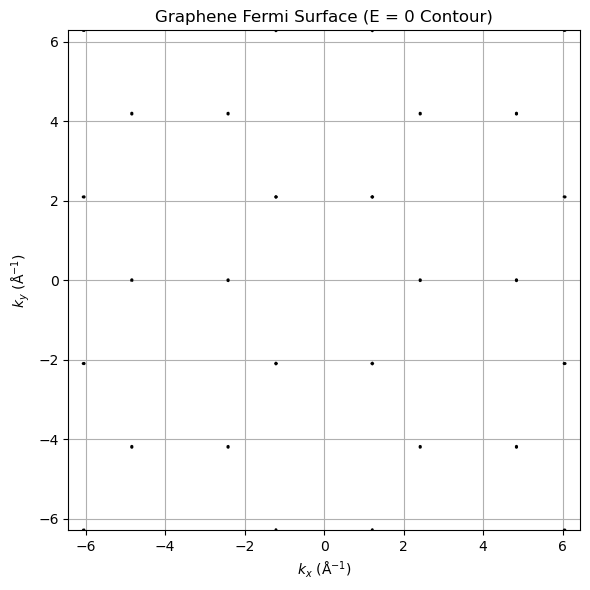

In [6]:
# Plot Fermi Surface (E = 0 contour)
kpts = 400
kx_vals = np.linspace(-2*np.pi/a, 2*np.pi/a, kpts)
ky_vals = np.linspace(-2*np.pi/a, 2*np.pi/a, kpts)
KX, KY = np.meshgrid(kx_vals, ky_vals)

E_plus = np.zeros_like(KX)
E_minus = np.zeros_like(KX)

for i in range(kpts):
    for j in range(kpts):
        E_plus[i,j] = energy(KX[i,j], KY[i,j])
        E_minus[i,j] = -energy(KX[i,j], KY[i,j])

plt.figure(figsize=(6,6))
cs = plt.contour(KX, KY, E_plus, levels=[0.1], colors='black')
plt.clabel(cs, inline=True, fontsize=10)
plt.title("Graphene Fermi Surface (E = 0 Contour)")
plt.xlabel('$k_x$ (Å$^{-1}$)')
plt.ylabel('$k_y$ (Å$^{-1}$)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

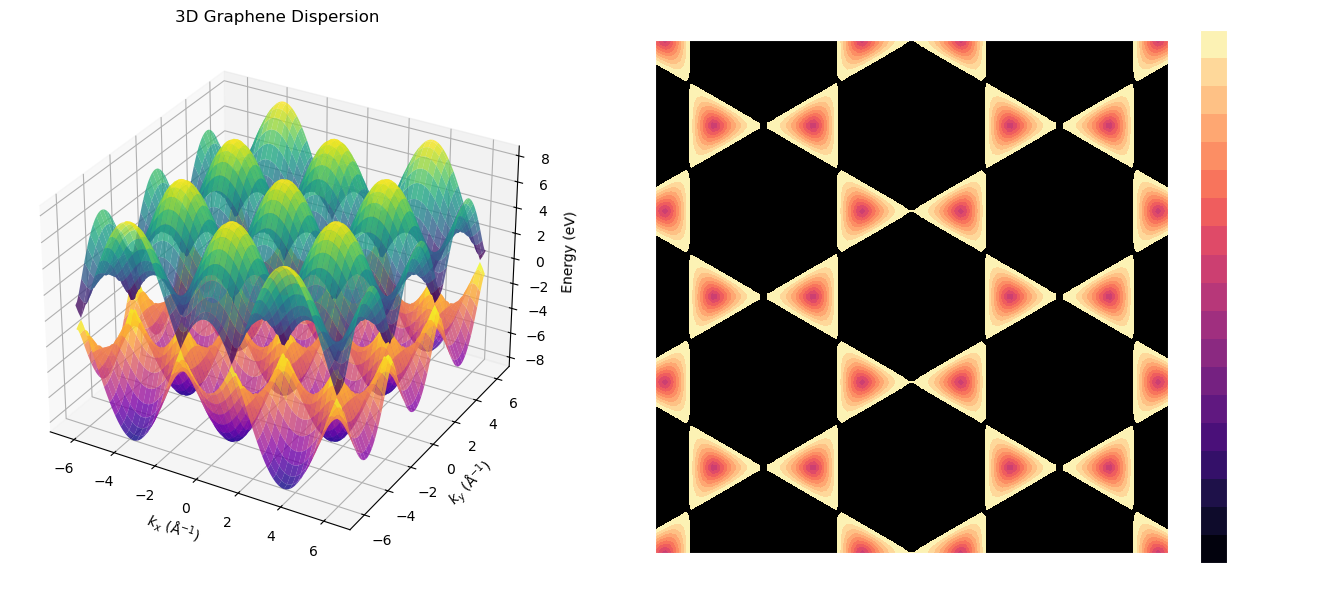

In [7]:
# Parameters
t = 2.8     # eV, hopping amplitude
a = 1.0     # lattice constant

# Define nearest neighbor vectors
delta = [
    a * np.array([0, 1]),
    a * np.array([np.sqrt(3)/2, -0.5]),
    a * np.array([-np.sqrt(3)/2, -0.5])
]

# Energy dispersion function
def f_k(kx, ky):
    return sum(np.exp(1j * (kx * dx + ky * dy)) for dx, dy in delta)

def energy(kx, ky):
    fk = f_k(kx, ky)
    return t * np.abs(fk)

# Generate k-space grid
kpts_3d = 100
kx_3d = np.linspace(-2*np.pi/a, 2*np.pi/a, kpts_3d)
ky_3d = np.linspace(-2*np.pi/a, 2*np.pi/a, kpts_3d)
KX_3D, KY_3D = np.meshgrid(kx_3d, ky_3d)

# Compute energy grid
E_3D = np.zeros_like(KX_3D)
for i in range(kpts_3d):
    for j in range(kpts_3d):
        E_3D[i,j] = energy(KX_3D[i,j], KY_3D[i,j])

# Create figure with subplots
fig = plt.figure(figsize=(14, 6))

# 3D Plot (no dark background)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(KX_3D, KY_3D, E_3D, cmap='viridis', alpha=0.8)
ax1.plot_surface(KX_3D, KY_3D, -E_3D, cmap='plasma', alpha=0.8)
ax1.set_title("3D Graphene Dispersion")
ax1.set_xlabel('$k_x$ (Å$^{-1}$)')
ax1.set_ylabel('$k_y$ (Å$^{-1}$)')
ax1.set_zlabel('Energy (eV)')

# Contour Plot (apply dark background only here)
with plt.style.context("dark_background"):
    ax2 = fig.add_subplot(122)
    contour_levels = np.linspace(-t, t, 20)
    cp = ax2.contourf(KX_3D, KY_3D, E_3D, levels=contour_levels, cmap='magma')
    ax2.contour(KX_3D, KY_3D, E_3D, levels=[0], colors='cyan', linewidths=2)
    ax2.set_title("Contour Plot of $E(\\mathbf{k})$")
    ax2.set_xlabel('$k_x$ (Å$^{-1}$)')
    ax2.set_ylabel('$k_y$ (Å$^{-1}$)')
    ax2.set_aspect('equal')
    cbar = fig.colorbar(cp, ax=ax2)
    cbar.set_label('Energy (eV)')

plt.tight_layout()
plt.show()

---